In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [130]:
df1 = pd.read_excel('commons-math.xlsx')
df2 = pd.read_excel('alibaba.xlsx')
df3 = pd.read_excel('vue-router.xlsx')
df4 = pd.read_excel('nodejs.xlsx')
df5 = pd.read_excel('django.xlsx')

df = pd.concat([df1, df2, df3 ,df4, df5], axis=0)

In [82]:
df

,PR_Number,num_commits,age,added_lines,deleted_lines,changed_lines,num_files,reviews_num,comments_num,commits_word_count,is_merged
0,230,1,3069,8,2,6,1,0,0,4,True
1,229,1,3009,1,1,4,1,0,0,4,False
2,228,1,2993,1,1,6,1,0,0,4,False
3,227,1,2940,2,1,12,1,0,0,8,True
4,226,1,2936,19,35,90,4,1,1,3,False
...,...,...,...,...,...,...,...,...,...,...,...
760,6,1,33,1,1,6,1,0,0,3,False
761,5,1,33,2,11,18,1,0,0,6,True
762,3,8,29,349,188,179,20,0,0,51,True
763,2,8,27,170,2,45,5,0,0,64,True


In [131]:
#remove id
df=df.drop(['PR_Number'], axis=1)

In [132]:
df['is_merged'].value_counts()

True     2015
False    1306
Name: is_merged, dtype: int64

#### Corrlation Analysis

In [133]:
# Calculate correlation coefficient between each feature and target variable
corr_matrix = df.corr()

# Print the correlation matrix
corr_matrix

,num_commits,age,added_lines,deleted_lines,changed_lines,num_files,reviews_num,comments_num,commits_word_count,is_merged
num_commits,1.000000,-0.019544,0.044339,0.173006,0.147935,0.137676,0.007730,0.008633,0.345175,-0.052647
age,-0.019544,1.000000,-0.018026,0.011657,0.074484,-0.018822,0.194652,0.057047,0.080814,-0.115150
added_lines,0.044339,-0.018026,1.000000,0.028505,0.048533,0.915847,-0.004825,-0.001009,0.027133,-0.035819
deleted_lines,0.173006,0.011657,0.028505,1.000000,0.542956,0.235477,0.004310,0.180632,0.119973,-0.044138
changed_lines,0.147935,0.074484,0.048533,0.542956,1.000000,0.168504,0.045770,0.040442,0.436040,-0.042185
num_files,0.137676,-0.018822,0.915847,0.235477,0.168504,1.000000,-0.005433,0.037763,0.089227,-0.043533
reviews_num,0.007730,0.194652,-0.004825,0.004310,0.045770,-0.005433,1.000000,0.714952,0.067739,-0.006202
comments_num,0.008633,0.057047,-0.001009,0.180632,0.040442,0.037763,0.714952,1.000000,0.043380,-0.035907
commits_word_count,0.345175,0.080814,0.027133,0.119973,0.436040,0.089227,0.067739,0.043380,1.000000,-0.121946
is_merged,-0.052647,-0.115150,-0.035819,-0.044138,-0.042185,-0.043533,-0.006202,-0.035907,-0.121946,1.000000


In [38]:
corr_matrix.to_excel('corr_matrix.xlsx', index=True)

In [16]:
df.columns

Index(['num_commits', 'age', 'added_lines', 'deleted_lines', 'changed_lines',
       'num_files', 'reviews_num', 'comments_num', 'commits_word_count',
       'is_merged'],
      dtype='object')

## Cross-Validation to choose best model

In [134]:
X = df.loc[:, ['num_commits', 'age', 'added_lines', 'deleted_lines', 'changed_lines', 'reviews_num', 'comments_num', 'commits_word_count']]
y = df.loc[:, 'is_merged']

In [135]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
    
    
# Create a KFold object with the number of folds you want
kfold = KFold(n_splits=5, shuffle=True, random_state=42)



#model = DecisionTreeClassifier()
#model = BernoulliNB()
#model = GaussianNB()
model = KNeighborsClassifier()
#model = LogisticRegression()


scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print("Model :",model)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Model : KNeighborsClassifier()
Accuracy: 0.63 (+/- 0.06)


### Model training

In [136]:
# Split the data into train and test sets first, using an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
# Train your model on the training data
model.fit(X_train, y_train)
    
# Make predictions on the test data
y_pred = model.predict(X_test)

## Model evaluation

In [98]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test , y_pred)
print("accuracy:",accuracy," precision :",precision," recall:",recall," f1",f1)

accuracy: 0.6300751879699248  precision : 0.6497890295358649  recall: 0.7938144329896907  f1 0.7146171693735499


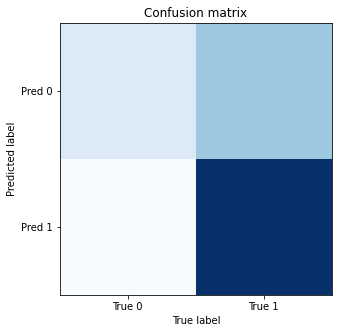

In [99]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test , y_pred)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap='Blues')

# add labels, title, and ticks
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['True 0', 'True 1'])
ax.set_yticklabels(['Pred 0', 'Pred 1'])
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
ax.set_title('Confusion matrix')
plt.show()

The correlation coefficient measures the strength and direction of the linear relationship between two variables. The higher the absolute value of the correlation coefficient, the more important the feature.

## Compare to baseline 

In [147]:
labels = [True, False]

probs = [0.6, 0.4]  

num_samples = 3321 
random_labels = np.random.choice(labels, size=num_samples, p=probs)


y_rand = random_labels


acc = accuracy_score(y,y_rand)
pre = precision_score(y,y_rand)
recal = recall_score(y,y_rand)
f1 = f1_score(y,y_rand)


print("accuracy:",acc," precision :",pre," recall:",recal," f1",f1)

accuracy: 0.5185185185185185  precision : 0.6038961038961039  recall: 0.6  f1 0.6019417475728155
